# Assignment 4 - Kinematics
*8 points*

## Task 1 - Questionnaire

Answer the questions below. Go back to the lecture slides to answer them. Always explain your answer, there may be more sense in it at a second glance. Stay brief and precise.

### State Space

Explain the following state space terms:

Configuration Space
```
# Your explanation

```

Task Space
```
# Your explanation

```

Holonomicity (holonomic, non-holonomic)
```
# Your explanation

```


### Degrees of Freedom

How many degrees of freedom do the following have:
* Train
```
# Your explanation

```

* Car
```
# Your explanation

```

* Helicopter
```
# Your explanation

```


How many degrees of freedom do we need for the following:
* move a book on a shelf? (Assuming the robot arm stays on the same height.)
```
# Your explanation

```

* fix a screw? (Assuming the robot arm is at the necessary pose.)
```
# Your explanation

```

* stack cartons on pallets? (Assuming we have a plane surface.)
```
# Your explanation

```


## Task 2 - Robot Design

Alongside the Notebooks you can find two files, a [URDF](arm.urdf) and a [launchfile](upload_robot.launch). URDF stand for unified robotics description format. It contains the stub of a robot arm. The launchfile does a few things:

* brings the URDF into the ROS network by loading it into the parameter server as `robot_description`. It stays there in XML format. Read it with `rosparam get /robot_description`
* starts the `joint_state_publisher` involving each joint of the URDF. Read it with `rostopic echo /joint_states`
* starts the `robot_state_publisher` to publish the kinematic chain as TF frames
* broadcast a static transform to TF between the frames `/map` and `/base_link`, where base_link is the root frame of our robot.


### Design the arm

Launch the robot into the ROS network with `roslaunch pycram upload_robot.launch`

Complete the URDF such that it looks ike this

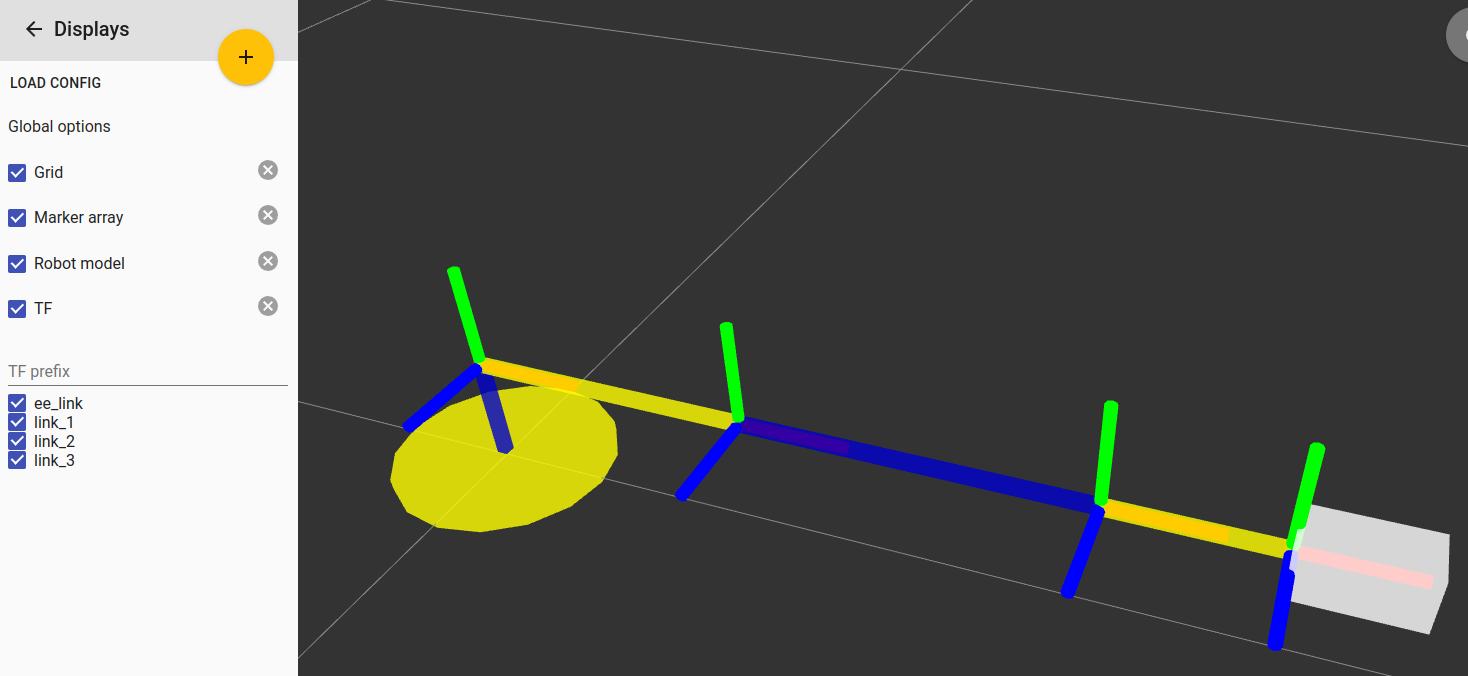


The exact measurements can be found here:

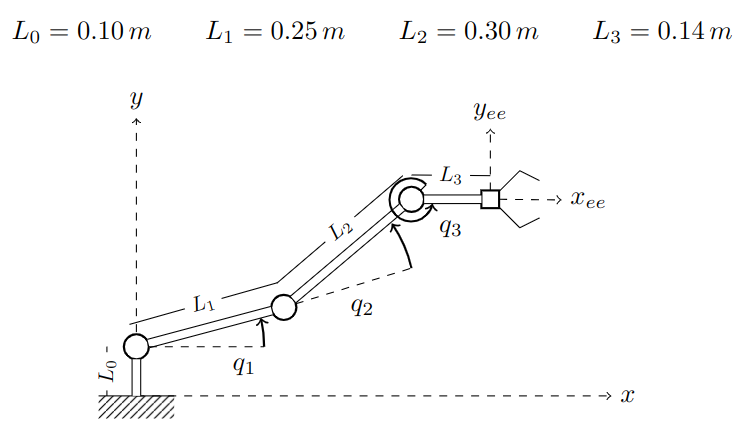

## Workflow tips

* Visualize the `Robot Model` in RViz. Remove and add the Robot Model after restarting the launchfile.
* Visualize TF in RViz. Note that only non-fixed joints are published to TF.
* Relaunch the launchfile whenever you change the URDF.
* The X-Axis of the current joint is always pointing to the next joint.
* Also check out the next part of the assignment to play with the joint values. It may help you understand how your joint is 

It may happen that TF is caching frames even when all your nodes are dead. When in doubt backup your progress and restart with a fresh session.

## Task 3 - Forward Kinematics

From the previous part you know how to launch the robot arm.

`roslaunch pycram upload_robot.launch`

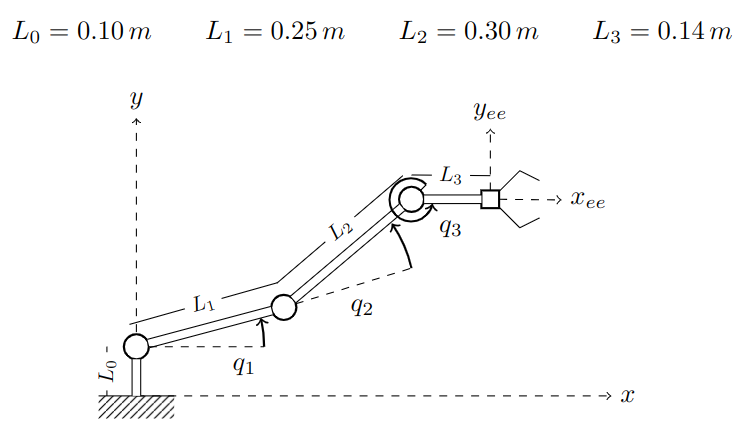

Specify the forward kinematic for the arm. Note that the angles are measured in the joint frame (same as in the lecture slides on forward kinematics). Hint: Use trigonometric calculations to get the x and y positions.

```
# Your explanation
x_ee =
y_ee =
```


### Calculate it

Now calculate it for the following joint angles:

q1 = 15°, q2 = 20°, q3 = -35°

In [ ]:
# Submit your calculation


### Check your solution

You can use the code below to apply the joint angles as joint states. Remember to translate the angles into radians (math.pi == 180°).

In [ ]:
# Import the stuff you need
import rospy
from sensor_msgs.msg import JointState
import math

In [ ]:
# Initialize rospy and the publisher
rospy.init_node('arm_state_publisher')
js_pub = rospy.Publisher("arm_joint_states", JointState, queue_size=10)

In [ ]:
joint_state = JointState()
joint_state.header.stamp = rospy.Time.now()

joint_state.name = ['link_1_joint', 'link_2_joint', 'link_3_joint']
joint_state.position = [0.1, 0.2, 0.3] # Replace these angles

js_pub.publish(joint_state)

Use a TF listener to check the end effector pose.

In [ ]:
import tf2_ros
import geometry_msgs.msg

tf_buffer = tf2_ros.Buffer()
listener = tf2_ros.TransformListener(tf_buffer)

In [ ]:
try:
    trans = tf_buffer.lookup_transform('base_link', 'ee_link', rospy.Time())
    print(trans)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
    pass

Y should be close to 0, while X and Z are spanning the 2D configuration space of the arm.